In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices,dmatrix,demo_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [52]:
# occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
#                         or unskilled worker; 3 = white-colloar; 4 = teacher
#                         counselor social worker, nurse; artist, writers;
#                         technician, skilled worker, 5 = managerial,
#                         administrative, business, 6 = professional with
#                         advanced degree
                        
# # same as occupation of husband

In [53]:
#https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_example.html
df = sm.datasets.fair.load_pandas().data
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [54]:
df['affairs'] = (df.affairs >0).astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [56]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [57]:
df[df['affairs']!=1].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0


In [58]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children +religious + educ',df, return_type="dataframe")

In [59]:
X.tail()

,Intercept,rate_marriage,age,yrs_married,children,religious,educ
6361,1.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,5.0,32.0,6.0,1.0,3.0,14.0
6365,1.0,4.0,22.0,2.5,0.0,2.0,16.0


In [60]:
data = demo_data("a", "b", "x1", "x2", "y", "z column")
data

{'a': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
 'b': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
 'x1': array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721]),
 'x2': array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433]),
 'y': array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
         0.6536186 ,  0.8644362 , -0.74216502]),
 'z column': array([ 2.26975462, -1.45436567,  0.04575852, -0.18718385,  1.53277921,
         1.46935877,  0.15494743,  0.37816252])}

In [61]:
dmatrix("0 + a:b", data)

DesignMatrix with shape (8, 4)
  a[a1]:b[b1]  a[a2]:b[b1]  a[a1]:b[b2]  a[a2]:b[b2]
            1            0            0            0
            0            0            1            0
            0            1            0            0
            0            0            0            1
            1            0            0            0
            0            0            1            0
            0            1            0            0
            0            0            0            1
  Terms:
    'a:b' (columns 0:4)

In [62]:
dmatrices("y ~ x1 + x2", data)

(DesignMatrix with shape (8, 1)
          y
    1.49408
   -0.20516
    0.31307
   -0.85410
   -2.55299
    0.65362
    0.86444
   -0.74217
   Terms:
     'y' (column 0),
 DesignMatrix with shape (8, 3)
   Intercept        x1        x2
           1   1.76405  -0.10322
           1   0.40016   0.41060
           1   0.97874   0.14404
           1   2.24089   1.45427
           1   1.86756   0.76104
           1  -0.97728   0.12168
           1   0.95009   0.44386
           1  -0.15136   0.33367
   Terms:
     'Intercept' (column 0)
     'x1' (column 1)
     'x2' (column 2))

<AxesSubplot:>

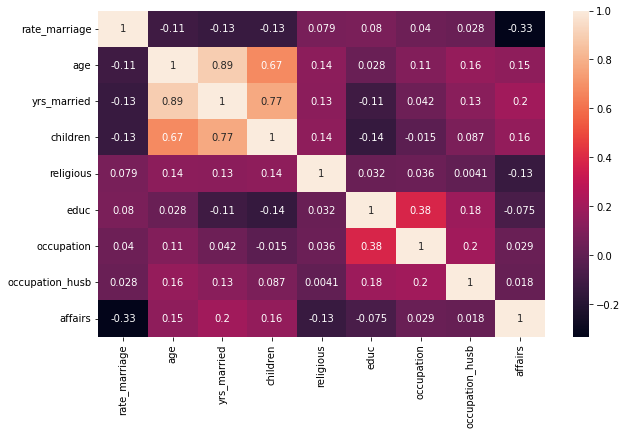

In [63]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [64]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [65]:
print(f"rate_marriage=={df.rate_marriage.unique()}")
print(f"age=={df.age.unique()}")
print(f"yrs_married=={df.yrs_married.unique()}")
print(f"children=={df.children.unique()}")
print(f"religious=={df.religious.unique()}")
print(f"educ=={df.educ.unique()}")
print(f"occupation=={df.occupation.unique()}")
print(f"occupation_husb=={df.occupation_husb.unique()}")

rate_marriage==[3. 4. 5. 2. 1.]
age==[32.  27.  22.  37.  42.  17.5]
yrs_married==[ 9.  13.   2.5 16.5 23.   6.   0.5]
children==[3.  0.  4.  1.  5.5 2. ]
religious==[3. 1. 2. 4.]
educ==[17. 14. 16. 12. 20.  9.]
occupation==[2. 3. 5. 4. 1. 6.]
occupation_husb==[5. 4. 3. 2. 6. 1.]


<AxesSubplot:xlabel='rate_marriage', ylabel='affairs'>

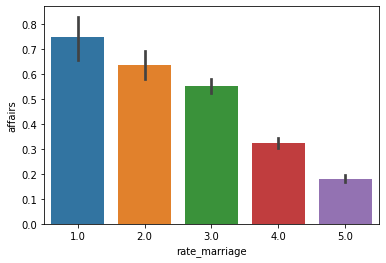

In [66]:
sns.barplot(x="rate_marriage", y="affairs", data=df)

<AxesSubplot:xlabel='age', ylabel='affairs'>

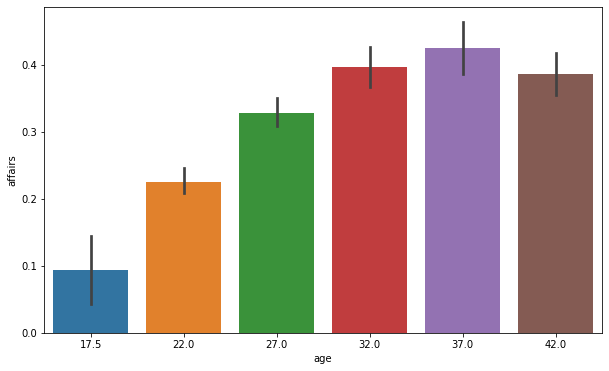

In [67]:
fig1,ax1 = plt.subplots(figsize=(10,6))
sns.barplot(x="age", y="affairs", data=df,ax=ax1)

<AxesSubplot:xlabel='age', ylabel='rate_marriage'>

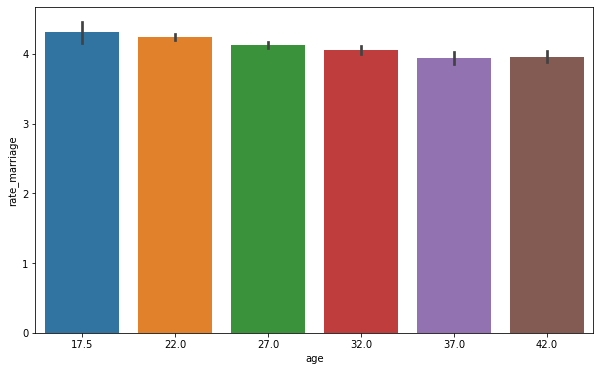

In [68]:
fig2,ax2= plt.subplots(figsize=(10,6))
sns.barplot(x="age", y="rate_marriage", data=df,ax=ax2)

<AxesSubplot:xlabel='age', ylabel='children'>

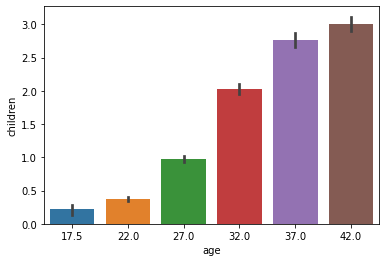

In [69]:
sns.barplot(x="age", y="children", data=df)

<AxesSubplot:xlabel='children', ylabel='affairs'>

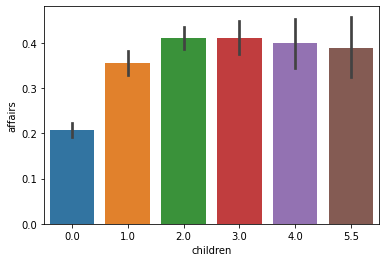

In [70]:
sns.barplot(x="children", y="affairs", data=df)

<AxesSubplot:xlabel='occupation', ylabel='affairs'>

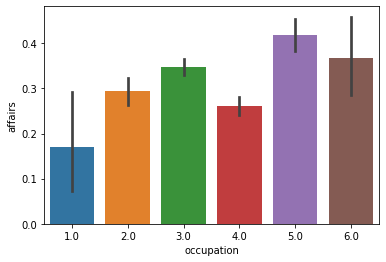

In [71]:
sns.barplot(x="occupation", y="affairs", data=df)

<AxesSubplot:xlabel='occupation_husb', ylabel='affairs'>

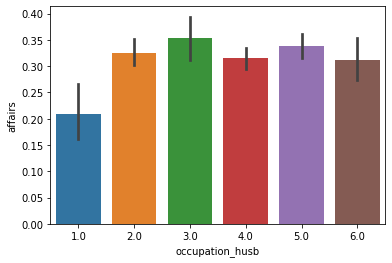

In [72]:
sns.barplot(x="occupation_husb", y="affairs", data=df)

<AxesSubplot:xlabel='educ', ylabel='affairs'>

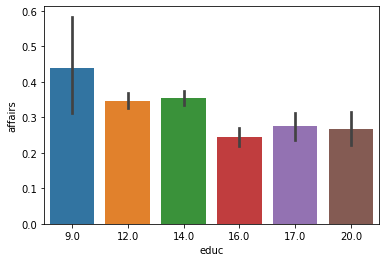

In [73]:
sns.barplot(x="educ", y="affairs", data=df)

<AxesSubplot:xlabel='religious', ylabel='affairs'>

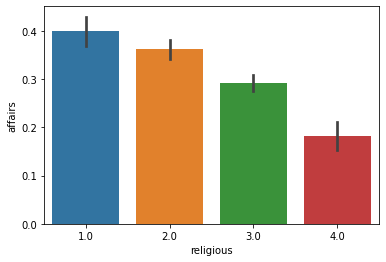

In [74]:
sns.barplot(x="religious", y="affairs", data=df)

<AxesSubplot:xlabel='children'>

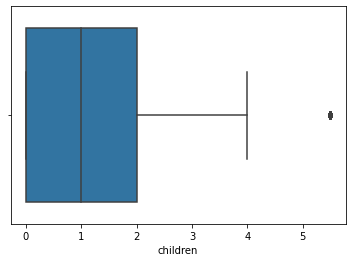

In [75]:
sns.boxplot(x=df["children"])

<AxesSubplot:xlabel='educ', ylabel='affairs'>

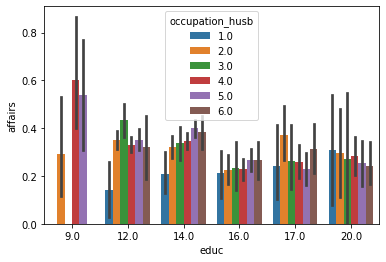

In [76]:
sns.barplot(x="educ", y="affairs",hue='occupation_husb', data=df)

In [77]:
df['affairs'].unique()

array([1, 0])

In [78]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


## eda result 
1. woman in 9 gradth pass and husband is among counselor social worker, 
nurse; artist, writers technician, skilled worker is mostly affected in relation
2. lower educated woman are mostly affecter with outside relation
3. 32-37 ages woman mostly affecter with outside relation
4. college graduate woman are mostly lowest affted with outside relation
5. religious woman are lowest affted with outside relation

In [79]:
df['age'].unique()

array([32. , 27. , 22. , 37. , 42. , 17.5])

In [86]:
X = df.loc[:,"rate_marriage":"occupation_husb"]

In [83]:
y = df['affairs']
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4265, 8)
(2101, 8)
(4265,)
(2101,)


In [ ]:
# predicted = cross_validation.cross_val_predict(LogisticRegression(), X_train, y_train, cv=10)
# print(metrics.accuracy_score(y_test, predicted))

In [93]:
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.7236534  0.73067916 0.69555035 0.72599532 0.70023419 0.75352113
 0.71596244 0.70657277 0.73943662 0.74178404]


In [97]:
log_reg.fit(X_train,y_train)
predict = log_reg.predict(X_test)

In [98]:
log_reg.score(X_train,y_train)

0.7245017584994138

In [100]:
# Test Score
metrics.accuracy_score(y_test, predict)

0.7206092336982389